# Kings County House Sales 


**Authors:** Maureen Kitang'a, Samuel Kyalo, Priscila Kamiri, Leo Kariuki, Jimcollins Wamae & Steve Githinji
***

## Business Understanding
### Overview

Real estate developers are interested in identifying factors that influence the sale price of homes in King County, as well as developing models to predict the sale price of homes based on these factors. This information can be used to optimize the design and marketing of new properties, identify investment opportunities, and make data-driven decisions about the development and sale of properties.
***

### Business Problem

The stakeholder is Real Estate Developer in a northwestern county who identifies and acquires land for new development projects, as well as oversees the construction process from start to finish. The Real Estate developer want to gain market insights that will lead to an increase in house sales.


***

### Problem Questions

* How does the size and quality of the property influence the sale price of homes in King County?
* How does the house neighborhood/location affect the prices?
* How accurately can we predict the sale price of homes in King County based on the available features?


## Data Undestanding

The King County House Sales dataset contains information on over 21,000 home sales in King County, Washington, USA between May 2014 and May 2015. The dataset includes a variety of features such as the number of bedrooms and bathrooms, the size of the property, the location of the property, and various other attributes that may influence the sale price of a home.

In [35]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore") 

In [36]:
# Your code here - remember to use markdown cells for comments as well!
data = pd.read_csv('data/kc_house_data.csv')

#Preview of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [37]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preparation

In [39]:
#checking for missing values
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Duplicates

In [40]:
# Create a function that checks for duplicates values
def check_duplicates(column):
    return column.duplicated().value_counts()

In [41]:
check_duplicates(data)

False    21597
dtype: int64

### Missing Values


The `waterfront` column is a categorical column. The column has 2 unique values, 'YES' and 'NO' with 2376 missing values. As this is a fairly number of the total records, we shall be replacing the missing values with the mode of the column. The mode of the column is 'NO'. Therefore, we shall be replacing the missing values with 'NO'.


In [42]:
# Fill the missing values with the mode of the column(waterfront)
data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode()[0])

The `view` column is a categorical column. With 63 missing values, . As this is a small number of the total records, we shall be replacing  the records with mode,in this case 'NO'.

In [43]:
# Fill the missing values with the mode of the column(view)
data['view'] = data['view'].fillna(data['view'].mode()[0])

The `yr renovated` column is a numerical column with 3842 missing values. Futhermore, majority of the data in the records were zero. This could either be suggesting that the homes have never been renovated or that the data is erroneous. As there is no ideal way of daling with these values, it would be best to drop the entire column.

In [44]:
# Drop the 'yr_renovated' column
data.drop('yr_renovated', axis=1, inplace=True)

# Preview the first five rows of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [45]:
# Convert all the ? values to 0.0 like we did for the other columns.
# Then convert the values from strings to int

data['sqft_basement'] = data["sqft_basement"].replace({"?": '0.0'})
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [46]:
#Convert the date column to datetime data type
data['date'] = pd.to_datetime(data['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  zipcode        2159

### Outliers

In [47]:
# Checking for outliers
def check_outliers(column):
    return sns.boxplot(column)

<AxesSubplot:xlabel='price'>

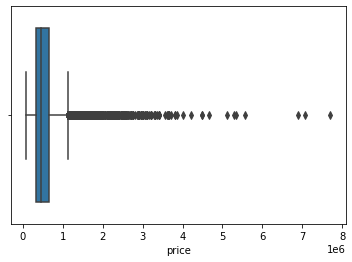

In [48]:
check_outliers(data['price'])

In [49]:
#Removing outliers in the price column


<AxesSubplot:xlabel='bedrooms'>

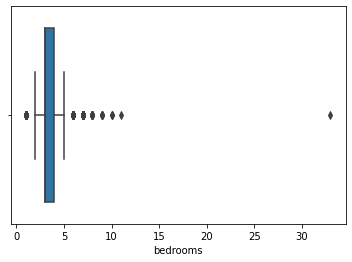

In [50]:
#Checking for outliers in the bedrooms column
check_outliers(data['bedrooms'])

In [51]:
#Removing outliers in the bedrooms column


<AxesSubplot:xlabel='bathrooms'>

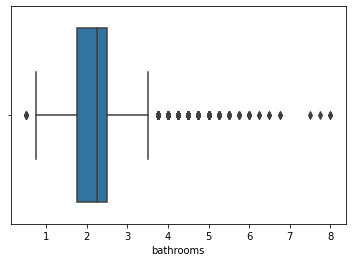

In [52]:
#Checking for outliers in the bathroom column
check_outliers(data['bathrooms'])

<AxesSubplot:xlabel='sqft_living'>

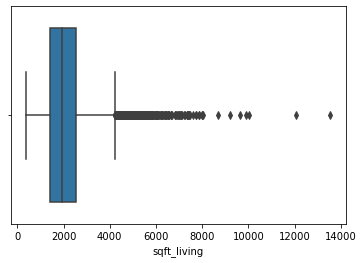

In [53]:
#Checking outliers in the sqft_living column
check_outliers(data['sqft_living'])

<AxesSubplot:xlabel='sqft_living15'>

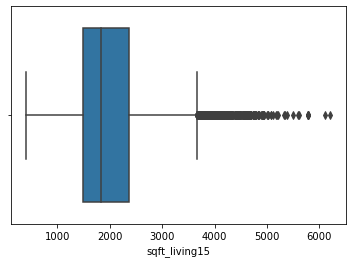

In [54]:
#Checking outliers in the sqft_lot column
check_outliers(data['sqft_living15'])

In [55]:
data=data.loc[(data['bedrooms']<6) & (data['bedrooms']>=2)]

data=data.loc[(data['bathrooms']<=3.5) & (data['bathrooms']>=0.5)]

data=data.loc[(data['price']<=3000000)]

data=data.loc[(data['sqft_living']<=6000)]

data=data.loc[(data['sqft_living15']<=5000)]

In [56]:
#Dropping the unnecessary columns
cols_to_drop = ['id','date','waterfront','zipcode','lat','long']
data = data.drop(columns=cols_to_drop)

### Correlation Check

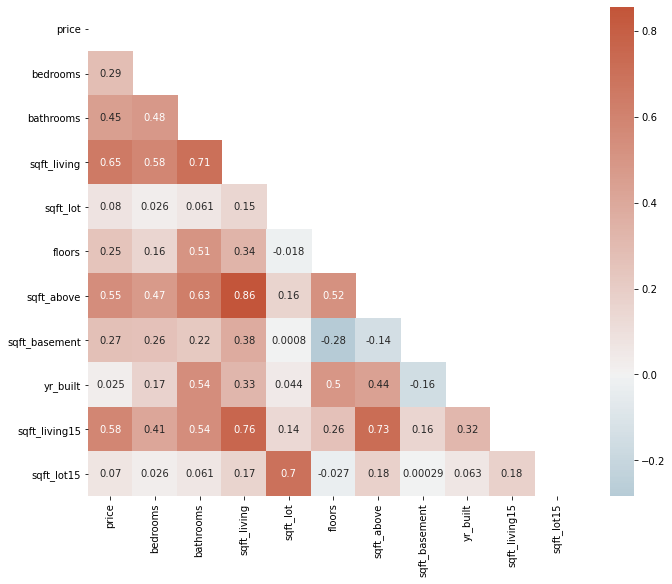

In [57]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), mask = mask, annot=True, center=0);

Based on the correlation matrix generated from the dataset, we can see that the most strongly correlated feature with the target column `price` is `sqft_living` with a correlation coefficient of `0.7`. This suggests that there is a strong positive linear relationship between the living area of a house and its price. Houses with larger living areas are likely to have higher prices than those with smaller living areas.

In [58]:
# Seperate groups of features into seperate dataframes: counts, size, quality
data_size = data[['price','sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']]
data_quality = data[['price','condition', 'grade', 'yr_built']]
data_counts = data[['price','floors', 'bedrooms', 'bathrooms', 'view']]

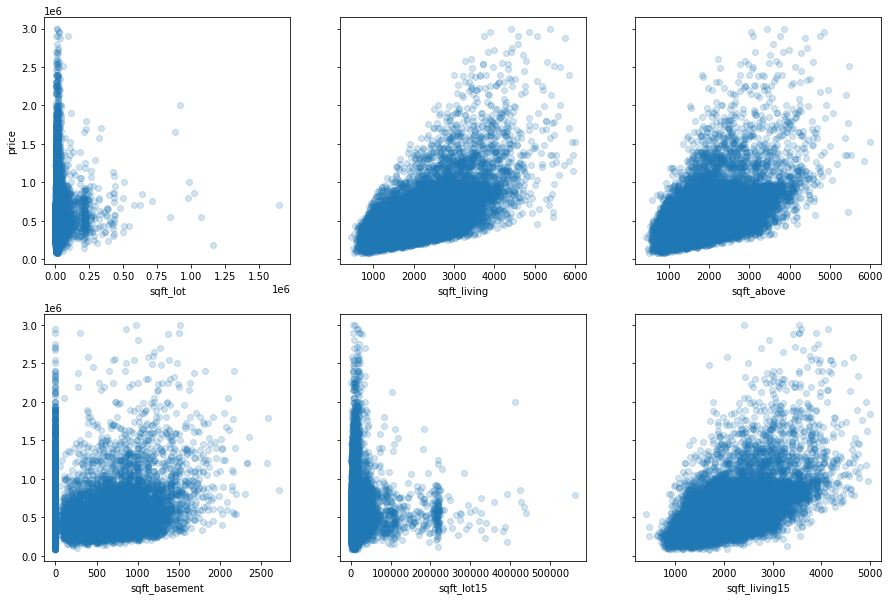

In [59]:
def plot_features(df, features):
    num_features = len(features)
    num_cols = min(num_features, 3)
    num_rows = (num_features + num_cols - 1) // num_cols
    
    fig, ax = plt.subplots(figsize=(5*num_cols, 5*num_rows), nrows=num_rows, ncols=num_cols, sharey=True)
    ax[0, 0].set_ylabel('price')
    
    i = 0
    for feature in features:
        ax[i//num_cols, i%num_cols].scatter(x=feature, y='price', data=df, alpha=0.2)
        ax[i//num_cols, i%num_cols].set_xlabel(feature)
        i += 1
    
    plt.show()

plot_features(data_size, ['sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15'])


### Linear Transformation

To make the results of our model more inerpretable, a linear transformation is carried out convert the numeric values from Imperial to Metric System.

In [60]:
# Scaling the sqft_living predictor so that the units are sqm rather sqft.
data['sqft_living'] = data['sqft_living'] * 0.092903

# Scaling the sqft_living15 predictor so that the units are sqm rather sqft.
data['sqft_living15'] = data['sqft_living15'] * 0.092903

# Scaling the sqft_above redictor so that the units are sqm rather sqft.
data['sqft_above'] = data['sqft_above'] * 0.092903



# Scaling the sqft_above redictor so that the units are sqm rather sqft.
data['sqft_lot'] = data['sqft_lot'] * 0.092903

# Scaling the sqft_above redictor so that the units are sqm rather sqft.
data['sqft_lot15'] = data['sqft_lot15'] * 0.092903

# Scaling the sqft_above redictor so that the units are sqm rather sqft.
data['sqft_basement'] = data['sqft_basement'] * 0.092903

# Renaming the transformed columns to sqm
data.rename(columns={'sqft_living': "sqm_living"},inplace=True)
data.rename(columns={'sqft_living15': "sqm_living15"},inplace=True)
data.rename(columns={'sqft_above': "sqm_above"},inplace=True)
data.rename(columns={'sqft_lot': "sqm_lot"},inplace=True)
data.rename(columns={'sqft_lot15': "sqm_lot15"},inplace=True)
data.rename(columns={'sqft_basement': "sqm_basement"},inplace=True)
            
data.tail()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,view,condition,grade,sqm_above,sqm_basement,yr_built,sqm_living15,sqm_lot15
21592,360000.0,3,2.50,142.14159,105.073293,3.0,NONE,Average,8 Good,142.14159,0.0,2009,142.14159,140.190627
21593,400000.0,4,2.50,214.60593,540.045139,2.0,NONE,Average,8 Good,214.60593,0.0,2014,170.01249,668.901600
21594,402101.0,2,0.75,94.76106,125.419050,2.0,NONE,Average,7 Average,94.76106,0.0,2009,94.76106,186.456321
21595,400000.0,3,2.50,148.64480,221.852364,2.0,NONE,Average,8 Good,148.64480,0.0,2004,130.99323,119.566161
21596,325000.0,2,0.75,94.76106,99.963628,2.0,NONE,Average,7 Average,94.76106,0.0,2008,94.76106,126.069371


### Log Transformations

Applying log transformation, we will be able to model a linear relationship between the transformed variables, even though there wasn't a linear relationship between the raw, un-transformed variables.


Text(0.5, 0, 'price')

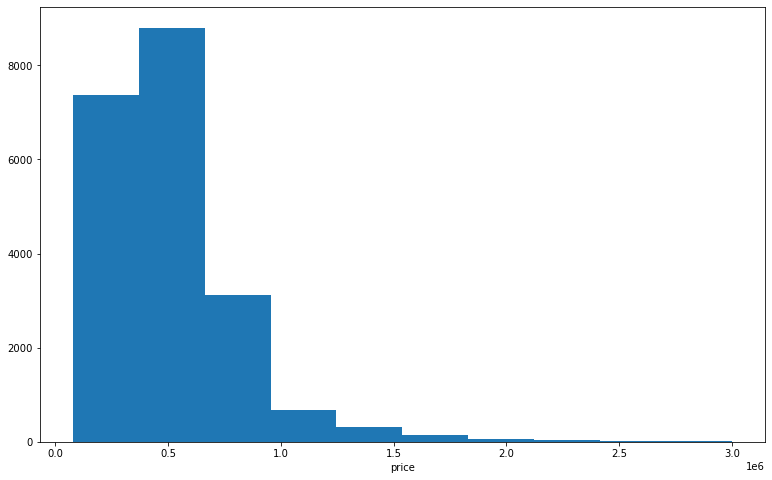

In [61]:
# Checking for normality in the price column
fig, ax1 = plt.subplots(figsize=(13,8))
ax1.hist(data["price"])
ax1.set_xlabel("price")

Looking at the distribution of `price` above, a log transformation is applicable.

Text(0.5, 0, 'Log_price')

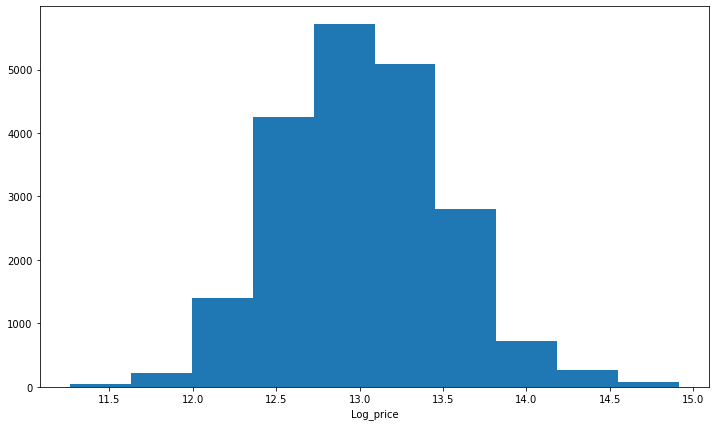

In [62]:
# Log transforming the target
data['log_price']= np.log(data['price'])

# Plotting the log transformed variable
fig, ax1 = plt.subplots(figsize=(12,7))
ax1.hist(data["log_price"])
ax1.set_xlabel("Log_price")

The `log_price` column is now 'more normal' than the original `price` column, thereby passing the normality assumption.

# Data Modelling

In this section, we shall use Regression technique.
Regression is a statistical method used to estimate the relationship between a dependent variable and one or more independent variables. The goal of regression analysis is to model the relationship between the variables and to use the model to make predictions or to understand the underlying factors that affect the dependent variable. In this case we are tying to estimate the effect that the different features of the homes has on our dependent variable, the price of the homes.

Furthermore, as we are working with multiple features, we will be using multiple linear regression. Multiple linear regression is a regression algorithm that is used to predict the value of a dependent variable based on the value of multiple independent variables (unlike simple linear regression which only uses one independent variable). 

### Simple Linear Regression


We will use simple linear regression as our baseline model. The regression will be between two variables , the sale price as the dependent variable and the size of living space(sqm) in the home as the independent variable in our model.

In [63]:
corr = data.corr()['price'].sort_values(ascending=False)
corr

price           1.000000
log_price       0.928169
sqm_living      0.651028
sqm_living15    0.583628
sqm_above       0.546428
bathrooms       0.447311
bedrooms        0.285262
sqm_basement    0.269020
floors          0.246941
sqm_lot         0.079603
sqm_lot15       0.069823
yr_built        0.025292
Name: price, dtype: float64

We see that the `sqm_living` column has the highest correlation with the `price` column. This is expected since the size of the house is a major factor in determining the price of the house. Let's create a scatter plot to determine the relationship between the `sqm_living` and `price` is linear.

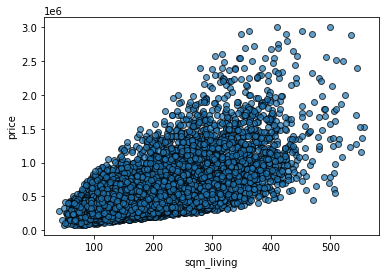

In [64]:
#plot a scatter plot of 'Price' against 'sqft_living'
plt.scatter(data['sqm_living'],data['price'], alpha=0.7, edgecolor='black')
plt.xlabel('sqm_living')
plt.ylabel('price')
plt.show()

In [65]:
# Assigning values of the variables
X = data[['sqm_living']]
y = data['price']

From the scatter plot we identified that the relationship is linear

In [66]:
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                 1.514e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:57:44   Log-Likelihood:            -2.8264e+05
No. Observations:               20582   AIC:                         5.653e+05
Df Residuals:                   20580   BIC:                         5.653e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.19e+04   4213.868      7.570      0.0

In [67]:
# calculate the mean absolute error of our baseline model
y_pred = baseline_results.predict(sm.add_constant(X))
baseline_mae = mean_absolute_error(y,y_pred)
baseline_mae

156769.76274346162

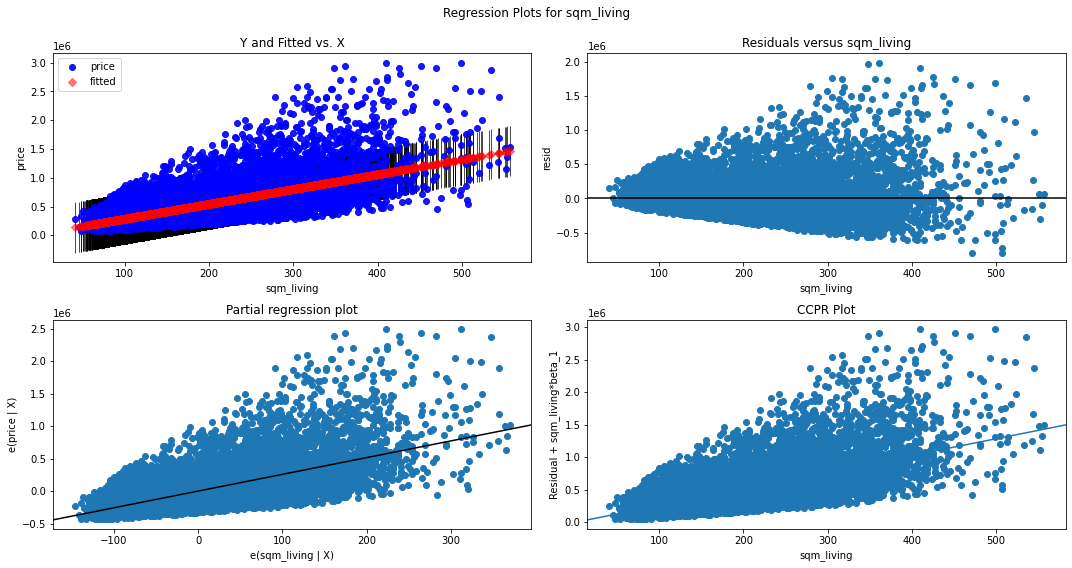

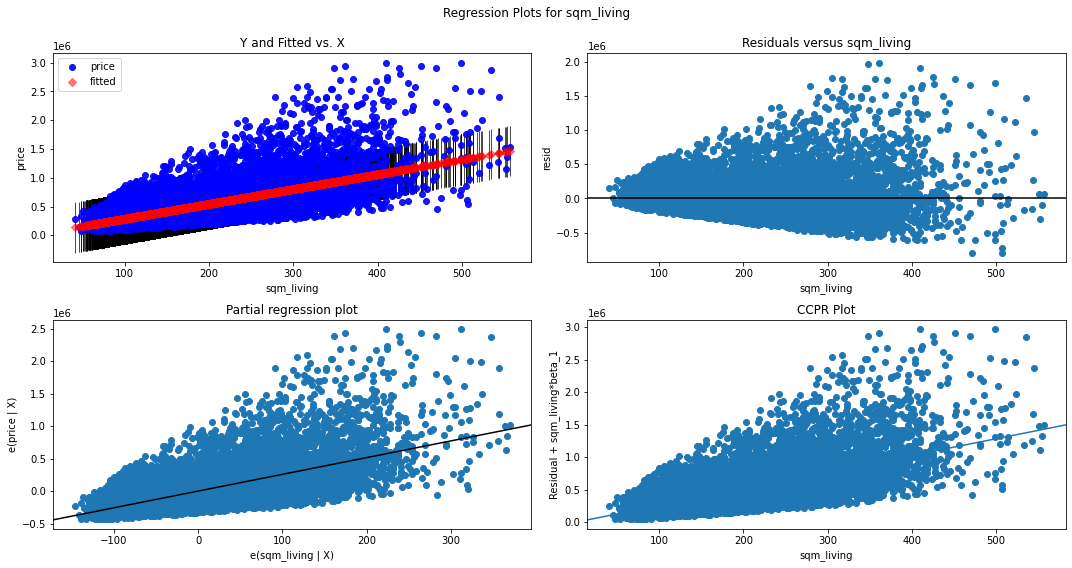

In [68]:
# Plot partial regression plot for the feature
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(
    baseline_results,
    'sqm_living',
    fig=fig)

### Baseline Model Evaluation and Interpretation

The baseline model is statistically significant overall, and explains about 42.4% of the variance in price. The model is ff by about $156,769

The coefficients for the intercept, `sqm_living` is statistically significant.

* Every increase of 1 in Square footage of living space in the home is associated with an increase of $2,574 in the Sale price .

### Multiple Linear Regression Plot

> We will now iterate the baseline model by building a multiple linear regression model that will have more than one independent variable.

We will start by creating a new dataframe that will contain all of the features that we want to have in our model.  In order to know which variables to keep in our model, we will first look at a correlation matrix. This is done in order to reduce multicollinearity. Multicollinearity is a situation in which two or more independent variables are highly correlated. This can cause problems in the model as it can lead to unstable estimates of the regression coefficients. Therefore, we will be removing the variables that are highly correlated with each other.

In [69]:
# Declare X_iterated variables
X_all = data[['bedrooms', 'bathrooms','sqm_living','sqm_living15', 'sqm_lot','floors', 'view', 'condition', 'grade', 'sqm_above', 'sqm_basement', 'yr_built']]

# Preview the X_iterated dataframe
pd.DataFrame(X_all).head()

,bedrooms,bathrooms,sqm_living,sqm_living15,sqm_lot,floors,view,condition,grade,sqm_above,sqm_basement,yr_built
0,3,1.00,109.62554,124.49002,524.901950,1.0,NONE,Average,7 Average,109.62554,0.00000,1955
1,3,2.25,238.76071,157.00607,672.803526,2.0,NONE,Average,7 Average,201.59951,37.16120,1951
2,2,1.00,71.53531,252.69616,929.030000,1.0,NONE,Average,6 Low Average,71.53531,0.00000,1933
3,4,3.00,182.08988,126.34808,464.515000,1.0,NONE,Very Good,7 Average,97.54815,84.54173,1965
4,3,2.00,156.07704,167.22540,750.656240,1.0,NONE,Average,8 Good,156.07704,0.00000,1987


#### Ordinal Encoding

>Ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels

Using the official [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r), we were able to understand that the values in the `condition` and `grade` columns are ordinal, and have been assigned a value based on the quality of the feature. Therefore, we will be ordinal encoding these columns.

In [70]:
# Create dictionaries for mapping the  numerical valueS
condition_dict = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
grade_dict = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, '7 Average': 7, '8 Good': 8, '9 Better': 9, '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13}


X_all['condition'] = X_all['condition'].map(condition_dict)
X_all['grade'] = X_all['grade'].map(grade_dict)

# Preview the dataframe
X_all.head()

,bedrooms,bathrooms,sqm_living,sqm_living15,sqm_lot,floors,view,condition,grade,sqm_above,sqm_basement,yr_built
0,3,1.00,109.62554,124.49002,524.901950,1.0,NONE,3,7,109.62554,0.00000,1955
1,3,2.25,238.76071,157.00607,672.803526,2.0,NONE,3,7,201.59951,37.16120,1951
2,2,1.00,71.53531,252.69616,929.030000,1.0,NONE,3,6,71.53531,0.00000,1933
3,4,3.00,182.08988,126.34808,464.515000,1.0,NONE,5,7,97.54815,84.54173,1965
4,3,2.00,156.07704,167.22540,750.656240,1.0,NONE,3,8,156.07704,0.00000,1987


#### One Hot Encoding

In [71]:
#Encoding the categorical columns
X_all = pd.get_dummies(X_all, columns=['view'], drop_first=False)
#Preview the dataframe
X_all

,bedrooms,bathrooms,sqm_living,sqm_living15,sqm_lot,floors,condition,grade,sqm_above,sqm_basement,yr_built,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,3,1.00,109.62554,124.49002,524.901950,1.0,3,7,109.62554,0.00000,1955,0,0,0,0,1
1,3,2.25,238.76071,157.00607,672.803526,2.0,3,7,201.59951,37.16120,1951,0,0,0,0,1
2,2,1.00,71.53531,252.69616,929.030000,1.0,3,6,71.53531,0.00000,1933,0,0,0,0,1
3,4,3.00,182.08988,126.34808,464.515000,1.0,5,7,97.54815,84.54173,1965,0,0,0,0,1
4,3,2.00,156.07704,167.22540,750.656240,1.0,3,8,156.07704,0.00000,1987,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,142.14159,142.14159,105.073293,3.0,3,8,142.14159,0.00000,2009,0,0,0,0,1
21593,4,2.50,214.60593,170.01249,540.045139,2.0,3,8,214.60593,0.00000,2014,0,0,0,0,1
21594,2,0.75,94.76106,94.76106,125.419050,2.0,3,7,94.76106,0.00000,2009,0,0,0,0,1
21595,3,2.50,148.64480,130.99323,221.852364,2.0,3,8,148.64480,0.00000,2004,0,0,0,0,1


In the `view` column, we shall be dropping the `NONE` column as the reference column. This will allow us to determine if having a waterfront has any effect on property value

In [72]:
X_all = X_all.drop(['view_NONE'], axis=1)
X_all.columns

Index(['bedrooms', 'bathrooms', 'sqm_living', 'sqm_living15', 'sqm_lot',
       'floors', 'condition', 'grade', 'sqm_above', 'sqm_basement', 'yr_built',
       'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD'],
      dtype='object')

##### Check for MultiCollinearity

In [73]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=X_all.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [74]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqm_above, sqm_living)",0.856068
"(sqm_living, sqm_living15)",0.758043


Using .75 as a cutoff, (sqm_living, sqm_above) and (sqm_living15, sqm_living) are highly correlated with correlation coefficients of 0.856068 and 0.758043, respectively. We are going to retain `sqm_living` since the rest have a lower correlation with the target variable(price)

In [75]:
X_all.drop(['sqm_above','sqm_living15'], axis=1, inplace=True)

In [76]:
iterated_model = sm.OLS(y, sm.add_constant(X_all))
iterated_results = iterated_model.fit()
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     2555.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:57:49   Log-Likelihood:            -2.7842e+05
No. Observations:               20582   AIC:                         5.569e+05
Df Residuals:                   20568   BIC:                         5.570e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            5.77e+06   1.16e+05     49.

In [78]:
y_pred = iterated_results.predict(sm.add_constant(X_all))
iterated_mae = mean_absolute_error(y,y_pred)
iterated_mae

125264.88468393344

In [79]:
# The mean absolute error values of the baseline model and iterated_model
print("Baseline Model Mean Absolute Error: ", baseline_mae)
print("Iterated Model Mean Absolute Error:", iterated_mae)


# The adjusted R-squared values of the baseline model and iterated model
print("Baseline Model Adjusted R-squared: ", baseline_results.rsquared_adj)
print("Iterated Model Adjusted R-squared: ", iterated_results.rsquared_adj)

Baseline Model Mean Absolute Error:  156769.76274346162
Iterated Model Mean Absolute Error: 125264.88468393344
Baseline Model Adjusted R-squared:  0.42381006580744274
Iterated Model Adjusted R-squared:  0.6173669993525615


Overally the model performed better.
From the model results, we can see that the model is statistically significant as it explains 61.7% of the variance in the data compared to the 42.4% in the baseline model. Furthermore, the model is off by about \$125,264 compared to the \$156,769 in the baseline model. This is a significant improvement. 

In [80]:
results_df = pd.concat([iterated_results.params, iterated_results.pvalues], axis =1)
results_df.columns = ['coefficient','p-value']
results_df

,coefficient,p-value
const,5.770190e+06,0.000000e+00
bedrooms,-2.924918e+04,4.104294e-46
bathrooms,3.027429e+04,6.300085e-21
sqm_living,1.355725e+03,0.000000e+00
sqm_lot,-9.118362e-01,9.375231e-03
floors,4.170907e+04,8.850087e-38
condition,2.156196e+04,4.130566e-24
grade,1.273774e+05,0.000000e+00
sqm_basement,1.275902e+02,2.982071e-03
yr_built,-3.345208e+03,0.000000e+00


All of the coefficients are statistically significant. 

`bedrooms`: a one-unit increase in the number of bedrooms is associated with a decrease of $29,249.18 in home price. 

`bathrooms`: a one-unit increase in the number of bathrooms is associated with an increase of $30,274.29  in home price. 

`sqm_living`: a one-unit increase in square metre of living space is associated with an increase of $1,355.725 in home price. 

`sqm_lot`: a one-unit increase in square metre of the lot size is associated with a decrease of $0.9118362 in home price. 

`floors`:  a one-unit increase in the number of floors is associated with an increase of $41,709.07 in home price. 

`condition`: a one-unit increase in the condition rating of the home is associated with an increase of $21,561.96 in home price. 

`grade`:  a one-unit increase in the grade rating of the home is associated with an increase of $127,377.4 in home price.

`sqm_basement`: a one-unit increase in the square metre of the basement is associated with an increase of $127.5902 in home price. 

`yr_built`: a one-unit increase in the year the home was built is associated with a decrease of $3,345.208 in home price. 

`view_EXCELLENT`: having an EXCELLENT view is associated with an increase of $380,546.5 in home price. This suggests that excellent views are highly desirable and tend to increase the price of a home.

`view_GOOD`: having a GOOD view is associated with an increase of $136,458.1 in home price. 

`view_FAIR`: having a FAIR view is associated with an increase of $105,127.1 in home price. 

`view_AVERAGE`: having an AVERAGE view is associated with an increase of $64,026.60 in home price. 
  

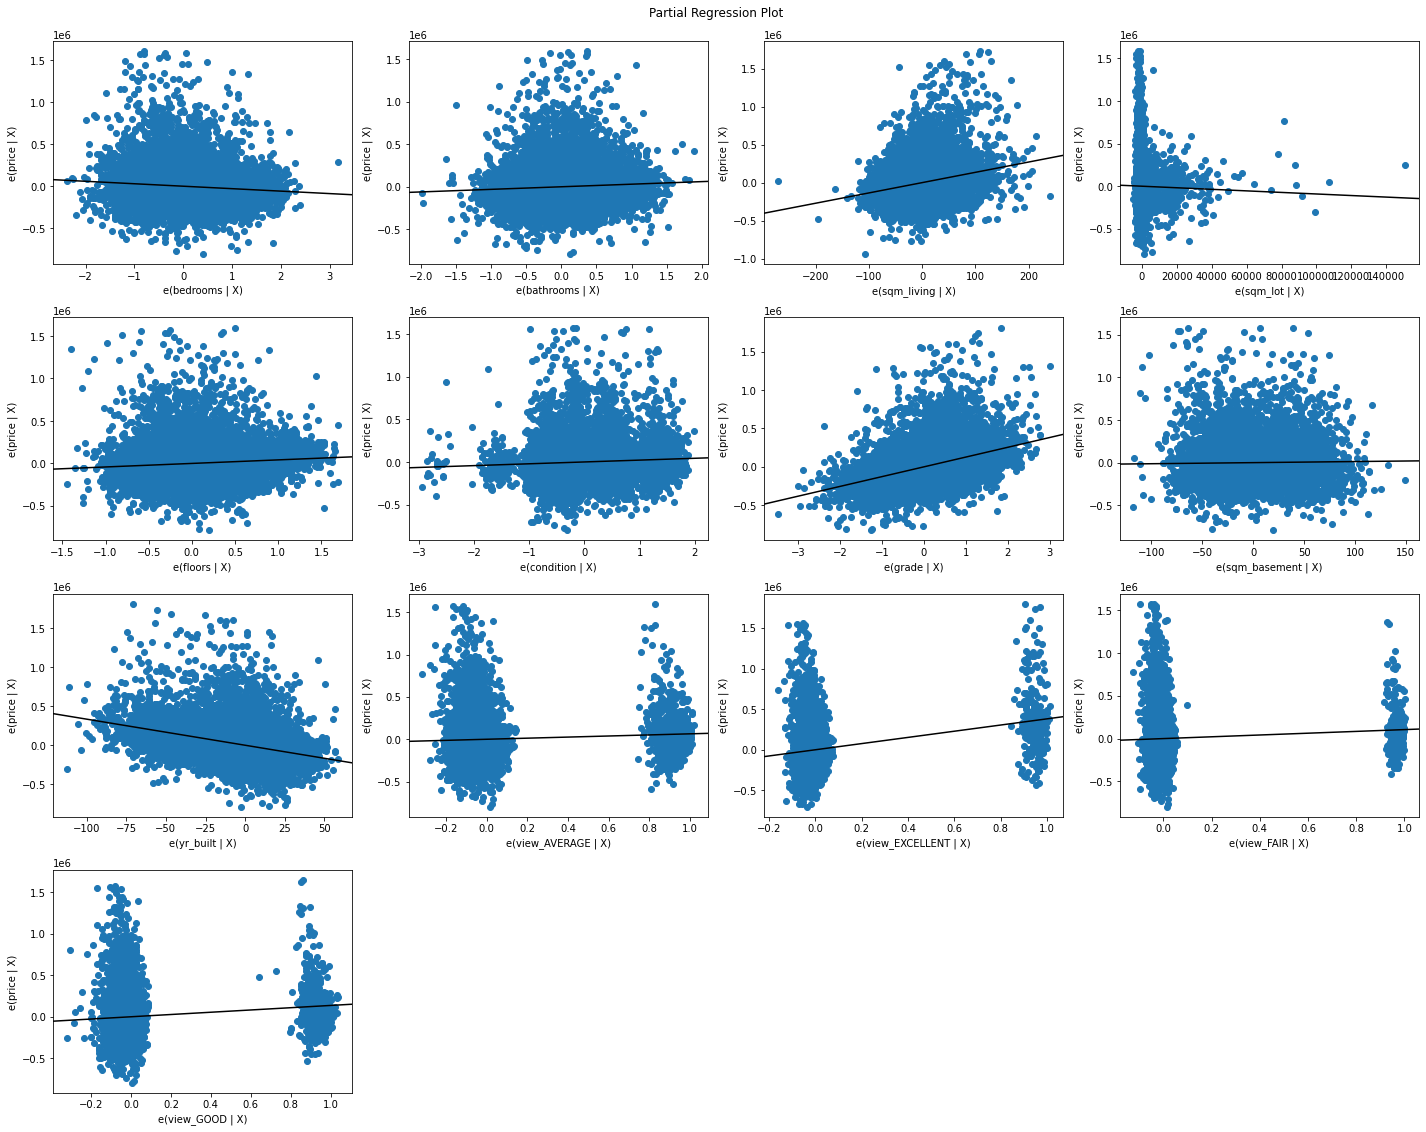

In [81]:
fig = plt.figure(figsize=(20,16))
sm.graphics.plot_partregress_grid(
                    iterated_results,
                    exog_idx=list(X_all.columns.values),
                    grid=(4,4),
                    fig=fig)
plt.show();

## Regression Results

##  Conclusion